**PREDICTING THE TIME TO COMPLETE THE ASSIGNMENT**

In [1]:
import pandas as pd

In [12]:
from google.colab import files


In [13]:
files.upload()

Saving assignmenttimeprediction.csv to assignmenttimeprediction.csv


{'assignmenttimeprediction.csv': b'PAGES,DIAGRAMS,TIME\r\n8,4,40\r\n14,3,70\r\n21,2,105\r\n3,5,35\r\n10,3,50\r\n16,2,80\r\n3,2,15\r\n21,2,105\r\n20,2,100\r\n16,5,80\r\n22,3,110\r\n23,4,115\r\n24,5,120\r\n15,2,75\r\n9,5,45\r\n3,1,15\r\n14,5,70\r\n23,2,115\r\n13,4,65\r\n3,5,35\r\n5,3,25\r\n18,3,90\r\n14,2,70\r\n14,5,70\r\n23,5,115\r\n13,5,65\r\n3,4,25\r\n25,1,125\r\n17,5,85\r\n22,4,110\r\n15,3,75\r\n19,4,95\r\n12,1,60\r\n11,1,55\r\n22,1,110\r\n10,2,50\r\n18,3,90\r\n4,3,20\r\n4,3,20\r\n11,3,55\r\n6,2,30\r\n12,1,60\r\n15,1,75\r\n11,5,55\r\n22,1,110\r\n22,4,110\r\n13,1,65\r\n25,1,125\r\n21,3,105\r\n18,2,90\r\n16,2,80\r\n21,2,105\r\n15,4,75\r\n6,1,30\r\n13,4,65\r\n22,5,110\r\n12,3,60\r\n5,4,25\r\n24,2,120\r\n20,4,100\r\n3,3,15\r\n18,3,90\r\n14,2,70\r\n9,2,45\r\n9,3,45\r\n18,1,90\r\n16,5,80\r\n11,4,55\r\n6,3,30\r\n8,5,40\r\n24,4,120\r\n22,5,110\r\n18,1,90\r\n24,4,120\r\n7,2,35\r\n10,2,50\r\n20,5,100\r\n3,1,15\r\n13,4,65\r\n23,4,115\r\n5,4,25\r\n17,3,85\r\n4,5,30\r\n5,4,25\r\n19,3,95\r\n17,3,8

**LOADING DATASET**

In [16]:
om=pd.read_csv('assignmenttimeprediction.csv')

In [17]:
om

,PAGES,DIAGRAMS,TIME
0,8,4,40
1,14,3,70
2,21,2,105
3,3,5,35
4,10,3,50
...,...,...,...
295,23,1,115
296,18,4,90
297,16,3,80
298,17,5,85


**DATA PREPROCESSING**

In [18]:
om.head()

,PAGES,DIAGRAMS,TIME
0,8,4,40
1,14,3,70
2,21,2,105
3,3,5,35
4,10,3,50


In [21]:
om.describe

<bound method NDFrame.describe of      PAGES  DIAGRAMS  TIME
0        8         4    40
1       14         3    70
2       21         2   105
3        3         5    35
4       10         3    50
..     ...       ...   ...
295     23         1   115
296     18         4    90
297     16         3    80
298     17         5    85
299     13         3    65

[300 rows x 3 columns]>

In [22]:
om.isnull()

,PAGES,DIAGRAMS,TIME
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
295,False,False,False
296,False,False,False
297,False,False,False
298,False,False,False


In [23]:
om.isnull().any()

PAGES       False
DIAGRAMS    False
TIME        False
dtype: bool

In [24]:
om.isnull().sum()

PAGES       0
DIAGRAMS    0
TIME        0
dtype: int64

**VISUALIZING DATA**

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

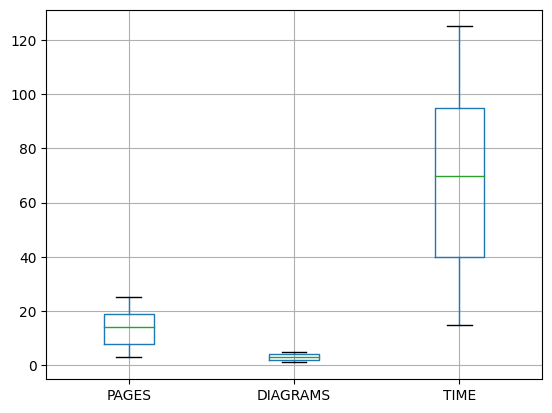

In [27]:
om.boxplot()

**MODEL BUILDING**

In [30]:
x=om.drop('TIME',axis=1)

In [31]:
y=om['TIME']

In [32]:
x

,PAGES,DIAGRAMS
0,8,4
1,14,3
2,21,2
3,3,5
4,10,3
...,...,...
295,23,1
296,18,4
297,16,3
298,17,5


In [33]:
y

0       40
1       70
2      105
3       35
4       50
      ... 
295    115
296     90
297     80
298     85
299     65
Name: TIME, Length: 300, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
LR=LinearRegression()

In [38]:
LR.fit(x_train,y_train)

LinearRegression()

In [39]:
prediction=LR.predict(x_test)

In [40]:
prediction

array([ 74.85597476,  25.9942425 ,  65.98390192,  56.66169228,
        25.9942425 , 123.2675702 ,  84.1781844 ,  36.21672576,
        74.85597476,  27.34465293,  81.09255841,  65.53376511,
        16.22189605,  54.86114504,  89.96463124, 114.39549737,
       110.40959777, 115.29577099,  90.41476805,  90.41476805,
        45.5389354 , 110.40959777, 113.49522375,  36.21672576,
        69.51966472,  95.75107809,  46.88934583,  90.41476805,
       113.49522375, 119.73180741, 118.83153379,  31.33055254,
        26.44437931, 113.49522375, 109.95946096,  31.33055254,
        26.44437931,  41.10289899,  50.42510863,  65.53376511,
        64.63349149, 109.95946096,  64.63349149,  45.98907221,
       108.60905052,  80.6424216 , 123.71770701, 110.40959777,
        85.07845802,  70.41993834,  26.89451612,  85.07845802,
       120.18194422,  80.19228479,  56.21155547,  90.86490486,
        65.53376511,  61.0977287 , 114.84563418,  45.98907221])

**EVALUATING MODEL**

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
import numpy as np

In [47]:
r2 = r2_score(y_test, prediction)

In [49]:
mse=mean_squared_error(y_test,prediction)

In [50]:
rmse=np.sqrt(mse)

In [52]:
print("R2 SCORE= ",r2)
print("MEAN SQUARED ERROR= ",mse)
print("ROOT MEAN SQUARED ERROR= ",rmse)

R2 SCORE=  0.9990767887906188
MEAN SQUARED ERROR=  0.9737570230948386
ROOT MEAN SQUARED ERROR=  0.9867912763572845
